In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re
import warnings
warnings.filterwarnings('ignore')
# wczytanie ramki danych ze zliczonymi wystąpieniami słów
df = pd.read_csv('AsianReligionsData/AllBooks_baseline_DTM_Labelled.csv')
df

,Unnamed: 0,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,BookOfWisdom_Ch15,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,BookOfWisdom_Ch16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,BookOfWisdom_Ch17,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
588,BookOfWisdom_Ch18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# ograniczenie liczby kolumn
l = []
for i in df.columns:
    if sum(df[i] != 0) > 10: # liczba wierszy z niererowymi wartościami dla każdego słowa
        l.append(i)
df = df[l]

,Unnamed: 0,hath,anger,open,illumination,tell,build,neither,land,visible,...,ones,set,personal,till,future,walketh,well,state,taketh,thoughts
0,Buddhism_Ch1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,BookOfWisdom_Ch15,2,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
586,BookOfWisdom_Ch16,0,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,1,0,0,0
587,BookOfWisdom_Ch17,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
588,BookOfWisdom_Ch18,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# wczytanie tekstów
with open('AsianReligionsData/Complete_data.txt', 'r',encoding='latin-1') as file:
    text = file.read()
text = re.split(r'\n\d\.\d+\n', text)
text = [re.sub(r'\d\.\d+\n','',i) for i in text]

In [129]:
# podział na słowa
word = re.compile(r'\b([A-Za-z]+)\b')
words = list(map(word.findall, text))

In [130]:
# podział na zdania
sentence = re.compile(r'\b([A-Z].*?[.!?]+)[\b\s\W]')
sentences = list(map(sentence.findall, text))

In [56]:
# obliczenie pewnych statystyk
n_words = [len(x) for x in words] # liczba słów w rozdziale
mean_word_len = [np.mean(list(map(len, x))) for x in words] # średnia długość słowa w rozdziale (w literach)
n_sentences = [len(x) for x in sentences] # liczba zdań w rozdziale
mean_sentence_len = [np.mean(list(map(lambda x:len(word.findall(x)), x))) for x in sentences] # średnia długość zdania w rozdziale (w słowach)

In [121]:
# poprawki
mean_word_len[13] = 0.0
mean_sentence_len[13] = 0.0
n_sentences[145] = 1
mean_sentence_len[145] = float(len(word.findall(text[145])))

In [137]:
# dodanie do ramki danych
df['n_words'] = n_words
df['mean_word_len'] = mean_word_len
df['n_sentences'] = n_sentences
df['mean_sentence_len'] = mean_sentence_len

# Modelowanie

In [138]:
columns = ['n_words', 'mean_word_len', 'n_sentences', 'mean_sentence_len']
X = df[df.columns[1:]]

In [157]:
# testowanie trzech modeli z silhouette score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

max_clusters = 15
scores = [[],[],[]]
for k in range(2, max_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage = 'ward')
    
    labels_kmeans = kmeans.fit_predict(X)
    labels_kmedoids = kmedoids.fit_predict(X)
    labels_agglomerative = agglomerative.fit_predict(X)
    
    wcss_kmeans = silhouette_score(X, labels_kmeans)
    wcss_kmedoids = silhouette_score(X, labels_kmedoids)
    wcss_agglomerative = silhouette_score(X, labels_agglomerative)
    
    scores[0].append(wcss_kmeans)
    scores[1].append(wcss_kmedoids)
    scores[2].append(wcss_agglomerative)

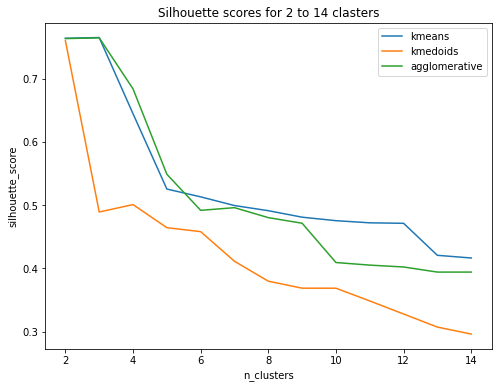

In [158]:
plt.figure(figsize=(8,6))
x = range(2,max_clusters)

plt.plot(x, scores[0], label = 'kmeans')
plt.plot(x, scores[1], label = 'kmedoids')
plt.plot(x, scores[2], label = 'agglomerative')

plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')

plt.title(f"Silhouette scores for 2 to {max_clusters - 1} clasters")
plt.legend()

plt.show()